In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel('/content/dataset.xlsx')
df.head()

,Sno,width,Length
0,1,3.7,19.4
1,2,2.9,15.3
2,3,3.9,22.6
3,4,2.2,18.3
4,5,3.0,19.3


Scatter plot 


<Axes: xlabel='width', ylabel='Length'>

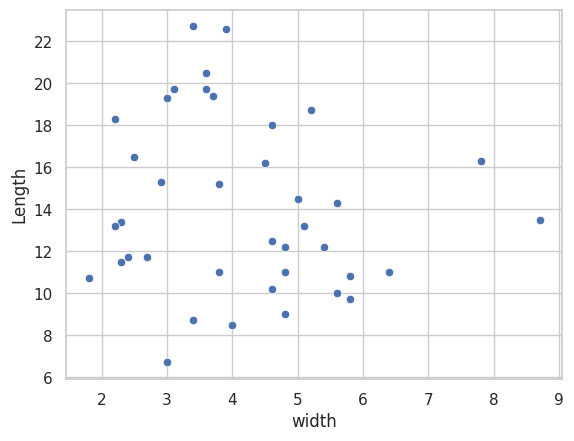

In [3]:
sns.set(style='whitegrid')
print("Scatter plot ")
sns.scatterplot(x='width',y='Length',data=df)

Histogram of lenght


<ipython-input-4-c9a497229ea5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'],bins =10,kde=False)


<Axes: xlabel='Length'>

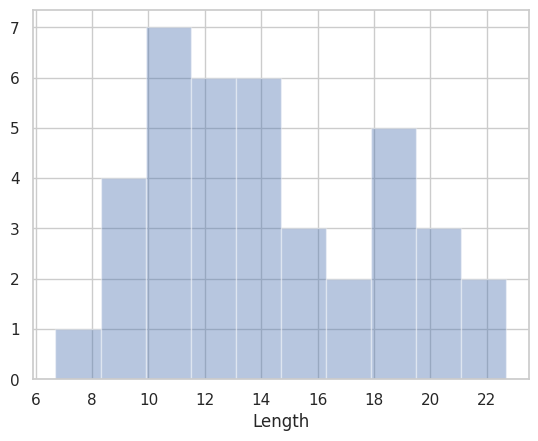

In [4]:
# histogram for lenght
print("Histogram of lenght")
sns.distplot(df['Length'],bins =10,kde=False)


Histogram of lenght


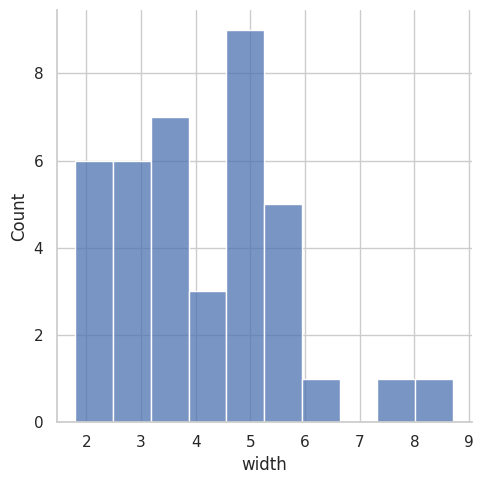

In [5]:
print("Histogram of lenght")

sns.displot(df['width'],bins=10,kde=False)

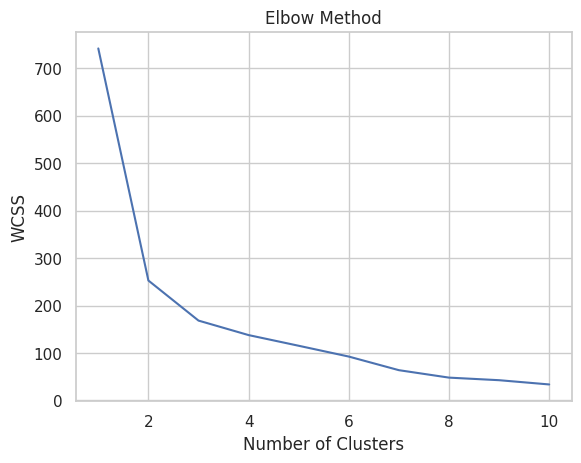

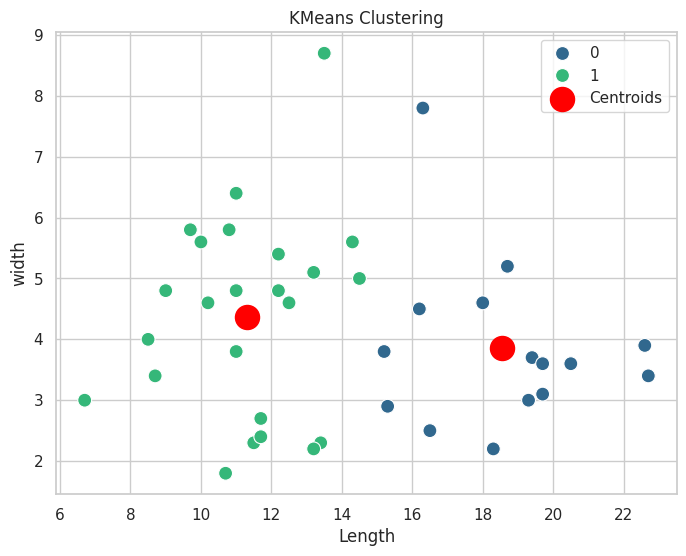

In [13]:

from sklearn.cluster import KMeans
X = df[['Length', 'width']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
# Role of wcss
# The wcss array stores the inertia values for different numbers of clusters.
# It helps determine the optimal cluster count by identifying the point where adding more clusters doesn't significantly reduce WCSS.
# The Elbow Method is used to find this optimal point.

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Length', y='width', hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Length')
plt.ylabel('width')
plt.legend()
plt.show()


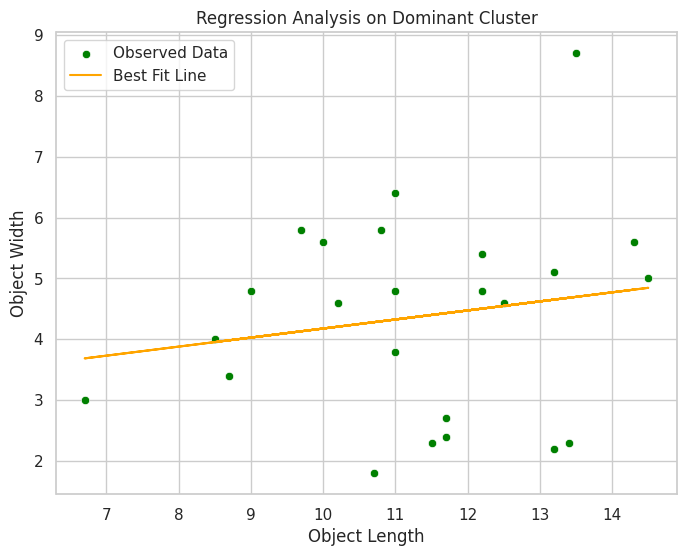

Intercept: 2.6912447988904287
Slope: 0.14863615349052242


In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Identify the largest cluster
largest_group = df['Cluster'].value_counts().idxmax()
largest_group_data = df[df['Cluster'] == largest_group]

# Define new variables
X_feature = largest_group_data[['Length']]
Y_target = largest_group_data['width']

# Train linear regression model
regressor = LinearRegression()
regressor.fit(X_feature, Y_target)

# Predict values
Y_predicted = regressor.predict(X_feature)

# Plot results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Length', y='width', data=largest_group_data, color='green', label='Observed Data')
plt.plot(X_feature, Y_predicted, color='orange', label='Best Fit Line')
plt.title('Regression Analysis on Dominant Cluster')
plt.xlabel('Object Length')
plt.ylabel('Object Width')
plt.legend()
plt.show()

# Print model parameters
print("Intercept:", regressor.intercept_)
print("Slope:", regressor.coef_[0])


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Sample dataset
features = np.array([[3, 19], [8, 16], [5, 13], [6, 9], [2, 11]])
target_classes = np.array([0, 1, 0, 1, 0])

# KNN Classification
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(features, target_classes)

test_samples = np.array([[3, 19], [8, 16], [5, 13], [6, 9], [2, 11]])
knn_results = knn_model.predict(test_samples)

print("Results using KNN:")
for i in range(len(test_samples)):
    print(f"Test Sample {features[i]}: Predicted Class {knn_results[i]}")

# Naïve Bayes Classification (Maximum Likelihood)
nb_model = GaussianNB()
nb_model.fit(features, target_classes)
nb_results = nb_model.predict(test_samples)

print("\nResults using Naïve Bayes (Maximum Likelihood):")
for i in range(len(test_samples)):
    print(f"Test Sample {features[i]}: Predicted Class {nb_results[i]}")


Results using KNN:
Test Sample [ 3 19]: Predicted Class 0
Test Sample [ 8 16]: Predicted Class 0
Test Sample [ 5 13]: Predicted Class 0
Test Sample [6 9]: Predicted Class 0
Test Sample [ 2 11]: Predicted Class 0

Results using Naïve Bayes (Maximum Likelihood):
Test Sample [ 3 19]: Predicted Class 0
Test Sample [ 8 16]: Predicted Class 1
Test Sample [ 5 13]: Predicted Class 0
Test Sample [6 9]: Predicted Class 1
Test Sample [ 2 11]: Predicted Class 0
